In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
#import pims
#import trackpy as tp
#from pims import Frame
import math

################################################
# Read csv data of tracking
################################################
dfL = pd.read_csv('frameL.csv')
dfR = pd.read_csv('frameR.csv')
dfL.head()

,Unnamed: 0,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,0,246.184615,66.758974,57.142332,0.838191,0.445255,16.996181,212.0,0.002786,0,0.0
1,1,245.896552,64.892720,74.194999,0.832758,0.469613,22.741762,248.0,0.002562,1,0.0
2,2,245.000000,62.972509,80.063145,0.833161,0.430693,24.486666,242.0,0.003350,2,0.0
3,3,244.107266,61.048443,81.353832,0.842225,0.395122,23.646097,199.0,0.002648,3,0.0
4,4,243.888535,59.149682,78.359956,0.844616,0.375000,22.459860,230.0,0.000750,4,0.0


In [60]:
dfL['Time'] = dfL['frame']*0.0001
dfL.head()

,Unnamed: 0,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle,Time
0,0,246.184615,66.758974,57.142332,0.838191,0.445255,16.996181,212.0,0.002786,0,0.0,0.0000
1,1,245.896552,64.892720,74.194999,0.832758,0.469613,22.741762,248.0,0.002562,1,0.0,0.0001
2,2,245.000000,62.972509,80.063145,0.833161,0.430693,24.486666,242.0,0.003350,2,0.0,0.0002
3,3,244.107266,61.048443,81.353832,0.842225,0.395122,23.646097,199.0,0.002648,3,0.0,0.0003
4,4,243.888535,59.149682,78.359956,0.844616,0.375000,22.459860,230.0,0.000750,4,0.0,0.0004


In [276]:
particle_id = 100
df0 = dfL[dfL['particle']==particle_id]
#df0 = df0[df0['frame']<120]
size = len(df0)
ini_index = df0['Unnamed: 0'].iloc[0]
fin_index = size-1 + ini_index
max_index = np.argmax(df0['mass'])
print(ini_index,max_index,fin_index)

(12945, 13073, 13140)


In [268]:
f = df0['frame']
t_fit = np.arange(f[ini_index],f[fin_index])*0.0001
t = df0['Time']
x = df0['x']
y = df0['y']
amp = df0['mass']
print(t_fit)
print(t)

[ 0.      0.0001  0.0002  0.0003  0.0004  0.0005  0.0006  0.0007  0.0008
  0.0009  0.001   0.0011  0.0012  0.0013  0.0014  0.0015  0.0016  0.0017
  0.0018  0.0019  0.002   0.0021  0.0022  0.0023  0.0024  0.0025  0.0026
  0.0027  0.0028  0.0029  0.003   0.0031  0.0032  0.0033  0.0034  0.0035
  0.0036  0.0037  0.0038  0.0039  0.004   0.0041  0.0042  0.0043  0.0044
  0.0045  0.0046  0.0047  0.0048  0.0049  0.005   0.0051  0.0052  0.0053
  0.0054  0.0055  0.0056  0.0057  0.0058  0.0059  0.006   0.0061  0.0062
  0.0063  0.0064  0.0065  0.0066  0.0067  0.0068  0.0069  0.007   0.0071
  0.0072  0.0073  0.0074  0.0075  0.0076  0.0077  0.0078  0.0079  0.008
  0.0081  0.0082  0.0083  0.0084  0.0085  0.0086  0.0087  0.0088  0.0089
  0.009   0.0091  0.0092  0.0093  0.0094  0.0095  0.0096  0.0097  0.0098
  0.0099  0.01    0.0101  0.0102  0.0103  0.0104  0.0105  0.0106  0.0107
  0.0108  0.0109  0.011   0.0111  0.0112  0.0113  0.0114  0.0115  0.0116
  0.0117  0.0118  0.0119  0.012   0.0121  0.0122  0.

In [269]:
from scipy.optimize import curve_fit
def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y
paramsX, pcovX = curve_fit(Parabola, t, x)
x_fit = Parabola(t_fit, paramsX[0], paramsX[1],paramsX[2])
print(pcovX)

[[  1.55687010e-02  -3.17414782e+00   1.34888186e+02]
 [ -3.17414782e+00   8.68275361e+02  -4.16107597e+04]
 [  1.34888186e+02  -4.16107597e+04   2.12949281e+06]]


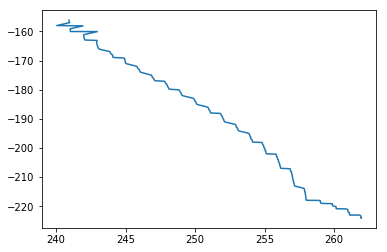

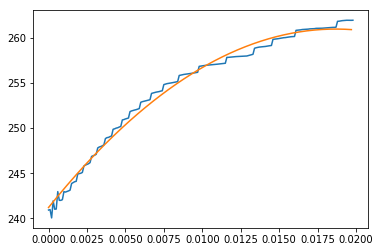

In [272]:
plt.figure()
plt.plot(t,x)
plt.plot(t_fit,x_fit)
plt.show()

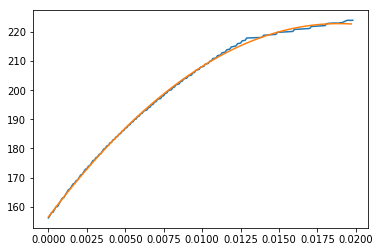

In [273]:
paramsY, pcovY = curve_fit(Parabola, t, y)
y_fit = Parabola(t_fit, paramsY[0], paramsY[1],paramsY[2])
plt.figure()
plt.plot(t,y)
plt.plot(t_fit,y_fit)
plt.show()

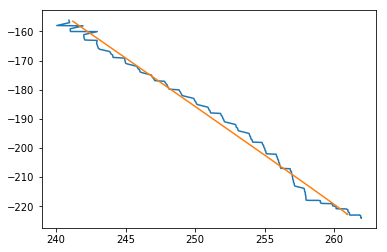

In [274]:
plt.figure()
plt.plot(x,-y)
plt.plot(x_fit,-y_fit)
plt.show()

In [275]:
zip(t_fit,x_fit,y_fit)

[(0.0, 241.20711163204379, 156.50202901665546),
 (0.0001, 241.41815390342987, 157.20249493626042),
 (0.00020000000000000001, 241.62806311485178, 157.8992437031944),
 (0.00030000000000000003, 241.83683926630951, 158.59227531745742),
 (0.00040000000000000002, 242.0444823578031, 159.28158977904943),
 (0.00050000000000000001, 242.25099238933251, 159.96718708797047),
 (0.00060000000000000006, 242.45636936089778, 160.64906724422053),
 (0.00069999999999999999, 242.66061327249886, 161.3272302477996),
 (0.00080000000000000004, 242.86372412413579, 162.00167609870772),
 (0.00090000000000000008, 243.06570191580855, 162.67240479694487),
 (0.001, 243.26654664751712, 163.33941634251102),
 (0.0011000000000000001, 243.46625831926156, 164.0027107354062),
 (0.0012000000000000001, 243.66483693104183, 164.66228797563036),
 (0.0013000000000000002, 243.86228248285795, 165.31814806318357),
 (0.0014, 244.05859497470988, 165.97029099806582),
 (0.0015, 244.25377440659764, 166.61871678027708),
 (0.001600000000000